In [64]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
dfhead = pd.read_csv('NBAFutures1.csv')
dftail = pd.read_csv('NBAFuturesTest1.csv')
df = dfhead.append(dftail, ignore_index = True)
df.head()

,Unnamed: 0,Player,Year,Pos,Age,Tm,G,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,PTS2,TRB2,AST2,STL2,BLK2
0,0,Kareem Abdul-Jabbar,1980,C,32,LAL,82,38.3,10.2,16.9,...,1.0,3.4,3.6,2.6,24.8,26.2,10.3,3.4,0.7,2.9
1,1,Kareem Abdul-Jabbar,1981,C,33,LAL,80,37.2,10.5,18.2,...,0.7,2.9,3.1,3.1,26.2,23.9,8.7,3.0,0.8,2.7
2,2,Kareem Abdul-Jabbar,1982,C,34,LAL,76,35.2,9.9,17.1,...,0.8,2.7,3.0,2.9,23.9,21.8,7.5,2.5,0.8,2.2
3,3,Kareem Abdul-Jabbar,1983,C,35,LAL,79,32.3,9.1,15.5,...,0.8,2.2,2.5,2.8,21.8,21.5,7.3,2.6,0.7,1.8
4,4,Kareem Abdul-Jabbar,1984,C,36,LAL,80,32.8,9.0,15.5,...,0.7,1.8,2.8,2.6,21.5,22.0,7.9,3.2,0.8,2.1


In [65]:
df = df.drop(['Unnamed: 0'], axis=1)

In [66]:
df = df[['Player','Year','Pos','Age','PTS','TRB','AST','STL','BLK','PTS2','TRB2','AST2','STL2','BLK2']]

In [67]:
dum1 = pd.get_dummies(df['Pos'])
df1 = pd.concat([df, dum1], axis=1)
df1 = df1.drop(['Pos'], axis=1)
df1 = df1.set_index('Player')
df1.head()

,Year,Age,PTS,TRB,AST,STL,BLK,PTS2,TRB2,AST2,STL2,BLK2,C,PF,PG,SF,SG
Player,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,1980,32,24.8,10.8,4.5,1.0,3.4,26.2,10.3,3.4,0.7,2.9,1,0,0,0,0
Kareem Abdul-Jabbar,1981,33,26.2,10.3,3.4,0.7,2.9,23.9,8.7,3.0,0.8,2.7,1,0,0,0,0
Kareem Abdul-Jabbar,1982,34,23.9,8.7,3.0,0.8,2.7,21.8,7.5,2.5,0.8,2.2,1,0,0,0,0
Kareem Abdul-Jabbar,1983,35,21.8,7.5,2.5,0.8,2.2,21.5,7.3,2.6,0.7,1.8,1,0,0,0,0
Kareem Abdul-Jabbar,1984,36,21.5,7.3,2.6,0.7,1.8,22.0,7.9,3.2,0.8,2.1,1,0,0,0,0


In [68]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
dum = ['PTS2','TRB2','AST2','STL2','BLK2']
for du in dum:
    cols.remove(du)

In [69]:
cols_at_end = ['PTS2','BLK2','STL2','AST2','TRB2']
df1 = df1[[c for c in df1 if c not in cols_at_end] + [c for c in cols_at_end if c in df1]]
check = df1.copy(deep=True)
df1.head()

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,1980,32,24.8,10.8,4.5,1.0,3.4,1,0,0,0,0,26.2,2.9,0.7,3.4,10.3
Kareem Abdul-Jabbar,1981,33,26.2,10.3,3.4,0.7,2.9,1,0,0,0,0,23.9,2.7,0.8,3.0,8.7
Kareem Abdul-Jabbar,1982,34,23.9,8.7,3.0,0.8,2.7,1,0,0,0,0,21.8,2.2,0.8,2.5,7.5
Kareem Abdul-Jabbar,1983,35,21.8,7.5,2.5,0.8,2.2,1,0,0,0,0,21.5,1.8,0.7,2.6,7.3
Kareem Abdul-Jabbar,1984,36,21.5,7.3,2.6,0.7,1.8,1,0,0,0,0,22.0,2.1,0.8,3.2,7.9


In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#cols = df1.columns
sc1 = StandardScaler()
for col in cols:
    df1[[col]] = sc1.fit_transform(df1[[col]])
sc2 = StandardScaler()
df1[['PTS2']] = sc2.fit_transform(df1[['PTS2']])    
sc3 = StandardScaler()
df1[['BLK2']] = sc3.fit_transform(df1[['BLK2']])
sc4 = StandardScaler()
df1[['STL2']] = sc4.fit_transform(df1[['STL2']])
sc5 = StandardScaler()
df1[['AST2']] = sc5.fit_transform(df1[['AST2']])
sc6 = StandardScaler()
df1[['TRB2']] = sc6.fit_transform(df1[['TRB2']])
df1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,-1.898146,1.407294,2.542378,2.635391,1.235413,0.536671,5.430987,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.764691,4.662253,0.008694,0.721331,2.471482
Kareem Abdul-Jabbar,-1.809213,1.662855,2.772446,2.443237,0.669076,-0.083946,4.504145,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.400079,4.283902,0.210459,0.516001,1.871146
Kareem Abdul-Jabbar,-1.720280,1.918416,2.394478,1.828344,0.463136,0.122926,4.133409,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.067173,3.338025,0.210459,0.259338,1.420895
Kareem Abdul-Jabbar,-1.631346,2.173977,2.049376,1.367174,0.205710,0.122926,3.206567,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.019615,2.581323,0.008694,0.310671,1.345853
Kareem Abdul-Jabbar,-1.542413,2.429538,2.000076,1.290312,0.257195,-0.083946,2.465093,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.098878,3.148849,0.210459,0.618666,1.570979


In [49]:
df3 = df1[0:len(dfhead)]
df4 = df1[len(dfhead):]

In [78]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

# Predictions

In [50]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [51]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

## 2018-2019 NBA Season

In [56]:
dftail = pd.read_csv('NBAFuturesTest1.csv')
dftail = dftail[['Player','PTS','TRB','AST','STL','BLK']]
dftail['Value'] = 1*dftail['PTS'] + 1.2*dftail['TRB'] + 1.5*dftail['AST'] + 3*dftail['STL'] + 3*dftail['BLK']
dftail = dftail.set_index('Player')
dftail.sort_values('Value', ascending=False).head(10)

,PTS,TRB,AST,STL,BLK,Value
Player,,,,,,
James Harden,36.1,6.6,7.5,2.0,0.7,63.37
Giannis Antetokounmpo,27.7,12.5,5.9,1.3,1.5,59.95
Russell Westbrook,22.9,11.1,10.7,1.9,0.5,59.47
Anthony Davis,25.9,12.0,3.9,1.6,2.4,58.15
Joel Embiid,27.5,13.6,3.7,0.7,1.9,57.17
LeBron James,27.4,8.5,8.3,1.3,0.6,55.75
Karl-Anthony Towns,24.4,12.4,3.4,0.9,1.6,51.88
Paul George,28.0,8.2,4.1,2.2,0.4,51.79
Nikola Jokic,20.1,10.8,7.3,1.4,0.7,50.31


## 2019 - 2020 NBA Season

In [52]:
train=df3
test=df4
trains = np.split(train, [12], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [12], axis=1)
test_x=tests[0]
test_y=tests[1]

In [53]:
test_y.head()

,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,
Alex Abrines,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Quincy Acy,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Jaylen Adams,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Steven Adams,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Bam Adebayo,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176


In [54]:
cols_at_end = ['TRB2','AST2','STL2','BLK2','PTS2']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    train_x3 = train_x
    test_x3 = test_x
    K.clear_session()
    model = Sequential()
    model.add(Dense(32, input_dim=12, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='Adam', loss='mean_squared_error')
    early_stop = EarlyStopping(monitor='loss', patience=20, verbose=0, min_delta=.000001,restore_best_weights=True)
    out = model.fit(train_x3.values, train_y[col].values, validation_data=[test_x3.values, test_y[col].values.ravel()], epochs=100, verbose=0, shuffle=False, callbacks=[early_stop])
    test_y2[col] = scalar.inverse_transform(model.predict(test_x3))

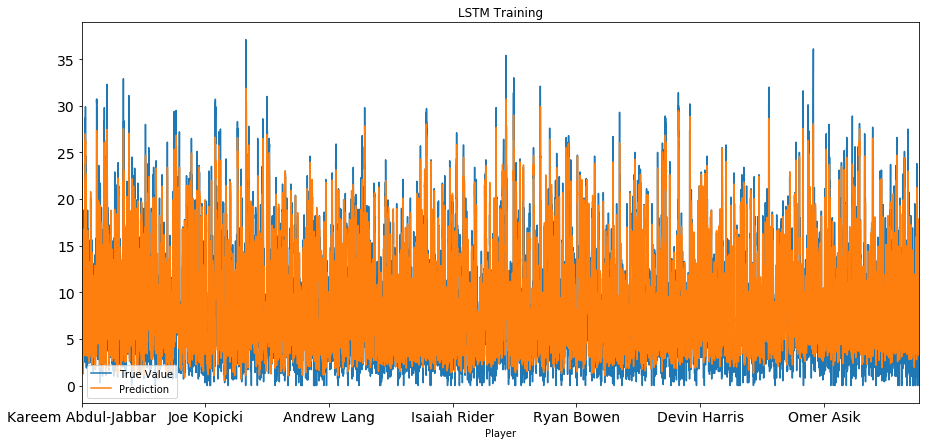

adj train r^2 = 0.755596509725128
train mse = 9.33460708949208


In [79]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x3))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))

In [55]:
print('The best players of the 2019-2020 Season are:')
test_y2['Value'] = 1*test_y2['PTS2'] + 1.2*test_y2['TRB2'] + 1.5*test_y2['AST2'] + 3*test_y2['STL2'] + 3*test_y2['BLK2']
test_y2.sort_values('Value', ascending=False).head(10)

The best players of the 2019-2020 Season are:


,PTS2,BLK2,STL2,AST2,TRB2,Value
Player,,,,,,
Anthony Davis,25.267326,2.074467,1.551586,3.944448,11.859908,56.294048
Giannis Antetokounmpo,25.836542,1.299073,1.227644,5.749029,11.240737,55.529121
Russell Westbrook,21.768028,0.431808,1.832841,9.793604,9.656533,54.840225
James Harden,28.969572,0.469720,1.784416,7.259469,6.495863,54.416218
Joel Embiid,25.288992,1.827739,0.805704,3.518874,12.191117,53.096977
LeBron James,25.272535,0.669473,1.237873,7.669595,8.299087,52.457870
Karl-Anthony Towns,24.095772,1.661603,0.938733,3.535461,11.929374,51.515221
Nikola Jokic,20.037491,0.792300,1.327730,7.135616,10.240957,49.390156
Andre Drummond,18.090122,1.723336,1.584670,2.051442,14.243955,48.184055


In [57]:
data2020 = test_y2
data2020.to_csv('2020Preds.csv')

## 2020 - 2021 Predictions

In [88]:
df3 = check[0:len(dfhead)]
df4 = check[len(dfhead):]
df4 = df4.sort_values('Player', ascending=True)
test_y2 = test_y2.sort_values('Player', ascending=True)
df4['Year'] = df4['Year'] + 1
df4['Age'] = df4['Age'] + 1
df4['PTS'] = test_y2['PTS2']
df4['TRB'] = test_y2['TRB2']
df4['AST'] = test_y2['AST2']
df4['STL'] = test_y2['STL2']
df4['BLK'] = test_y2['BLK2']
df4.head()

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Aaron Gordon,2020,24,16.068285,6.846883,3.527610,0.657897,0.584146,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0
Aaron Holiday,2020,23,7.156102,1.801264,1.973739,0.567420,0.247900,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0
Abdel Nader,2020,26,5.311233,2.327258,0.501766,0.393384,0.282234,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
Al Horford,2020,33,12.905059,6.047277,3.941989,0.773371,1.096115,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0
Al-Farouq Aminu,2020,29,8.469641,6.264689,1.103913,0.634668,0.412355,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0


In [89]:
df1 = df3.append(df4)
df1.head()

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,1980,32,24.8,10.8,4.5,1.0,3.4,1,0,0,0,0,26.2,2.9,0.7,3.4,10.3
Kareem Abdul-Jabbar,1981,33,26.2,10.3,3.4,0.7,2.9,1,0,0,0,0,23.9,2.7,0.8,3.0,8.7
Kareem Abdul-Jabbar,1982,34,23.9,8.7,3.0,0.8,2.7,1,0,0,0,0,21.8,2.2,0.8,2.5,7.5
Kareem Abdul-Jabbar,1983,35,21.8,7.5,2.5,0.8,2.2,1,0,0,0,0,21.5,1.8,0.7,2.6,7.3
Kareem Abdul-Jabbar,1984,36,21.5,7.3,2.6,0.7,1.8,1,0,0,0,0,22.0,2.1,0.8,3.2,7.9


In [90]:
sc1 = StandardScaler()
for col in cols:
    df1[[col]] = sc1.fit_transform(df1[[col]])
sc2 = StandardScaler()
df1[['PTS2']] = sc2.fit_transform(df1[['PTS2']])    
sc3 = StandardScaler()
df1[['BLK2']] = sc3.fit_transform(df1[['BLK2']])
sc4 = StandardScaler()
df1[['STL2']] = sc4.fit_transform(df1[['STL2']])
sc5 = StandardScaler()
df1[['AST2']] = sc5.fit_transform(df1[['AST2']])
sc6 = StandardScaler()
df1[['TRB2']] = sc6.fit_transform(df1[['TRB2']])
df1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,-1.891300,1.398062,2.554207,2.645201,1.240697,0.540614,5.445371,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.764691,4.662253,0.008694,0.721331,2.471482
Kareem Abdul-Jabbar,-1.802844,1.653696,2.785463,2.452292,0.671526,-0.083375,4.516128,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.400079,4.283902,0.210459,0.516001,1.871146
Kareem Abdul-Jabbar,-1.714388,1.909330,2.405543,1.834983,0.464555,0.124622,4.144431,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.067173,3.338025,0.210459,0.259338,1.420895
Kareem Abdul-Jabbar,-1.625932,2.164964,2.058659,1.372001,0.205840,0.124622,3.215189,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.019615,2.581323,0.008694,0.310671,1.345853
Kareem Abdul-Jabbar,-1.537475,2.420598,2.009104,1.294838,0.257583,-0.083375,2.471795,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.098878,3.148849,0.210459,0.618666,1.570979


In [91]:
train = df1[0:len(dfhead)]
test = df1[len(dfhead):]
trains = np.split(train, [12], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [12], axis=1)
test_x = tests[0]
test_y = tests[1]
test_y.head()

,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,
Aaron Gordon,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Aaron Holiday,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Abdel Nader,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Al Horford,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Al-Farouq Aminu,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176


In [92]:
cols_at_end = ['TRB2','AST2','STL2','BLK2','PTS2']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    train_x3 = train_x
    test_x3 = test_x
    K.clear_session()
    model = Sequential()
    model.add(Dense(32, input_dim=12, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='Adam', loss='mean_squared_error')
    early_stop = EarlyStopping(monitor='loss', patience=20, verbose=0, min_delta=.000001,restore_best_weights=True)
    out = model.fit(train_x3.values, train_y[col].values, validation_data=[test_x3.values, test_y[col].values.ravel()], epochs=100, verbose=0, shuffle=False, callbacks=[early_stop])
    test_y2[col] = scalar.inverse_transform(model.predict(test_x3))

In [93]:
print('The best players of the 2020-2021 Season are:')
test_y2['Value'] = 1*test_y2['PTS2'] + 1.2*test_y2['TRB2'] + 1.5*test_y2['AST2'] + 3*test_y2['STL2'] + 3*test_y2['BLK2']
test_y2.sort_values('Value', ascending=False).head(10)

The best players of the 2020-2021 Season are:


,PTS2,BLK2,STL2,AST2,TRB2,Value
Player,,,,,,
Anthony Davis,24.238255,1.946997,1.493939,3.899640,11.808391,54.580593
Joel Embiid,24.954763,1.836266,0.821696,3.442647,12.208431,52.742737
Karl-Anthony Towns,24.311323,1.721621,0.973206,3.615568,12.180518,52.435776
Giannis Antetokounmpo,24.196270,1.124943,1.146074,5.392211,10.528596,51.731953
Russell Westbrook,19.069986,0.444358,1.756858,9.091261,8.994068,50.103405
Nikola Jokic,21.128544,0.908089,1.352480,6.656408,9.494887,49.288723
LeBron James,22.549143,0.751951,1.235754,7.262877,7.977043,48.979023
James Harden,24.363558,0.396242,1.484306,6.845454,6.365992,47.912575
Andre Drummond,17.782328,1.701584,1.482556,2.606917,13.408819,47.335705


In [94]:
data2021 = test_y2
data2021.to_csv('2021Preds.csv')

## 2021 - 2022 Predictions

In [96]:
df3 = check[0:len(dfhead)]
df4 = check[len(dfhead):]
df4 = df4.sort_values('Player', ascending=True)
test_y2 = test_y2.sort_values('Player', ascending=True)
df4['Year'] = df4['Year'] + 2
df4['Age'] = df4['Age'] + 2
df4['PTS'] = test_y2['PTS2']
df4['TRB'] = test_y2['TRB2']
df4['AST'] = test_y2['AST2']
df4['STL'] = test_y2['STL2']
df4['BLK'] = test_y2['BLK2']
df4.head()

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Aaron Gordon,2021,25,15.916447,6.455046,3.401062,0.623841,0.447508,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0
Aaron Holiday,2021,24,7.215670,2.068390,2.106884,0.603074,0.226897,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0
Abdel Nader,2021,27,5.629391,2.473598,0.654943,0.424088,0.320047,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
Al Horford,2021,34,11.353054,5.565151,3.328622,0.641908,0.962705,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0
Al-Farouq Aminu,2021,30,7.217525,5.382841,1.028466,0.508538,0.346612,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0


In [97]:
df1 = df3.append(df4)
sc1 = StandardScaler()
for col in cols:
    df1[[col]] = sc1.fit_transform(df1[[col]])
sc2 = StandardScaler()
df1[['PTS2']] = sc2.fit_transform(df1[['PTS2']])    
sc3 = StandardScaler()
df1[['BLK2']] = sc3.fit_transform(df1[['BLK2']])
sc4 = StandardScaler()
df1[['STL2']] = sc4.fit_transform(df1[['STL2']])
sc5 = StandardScaler()
df1[['AST2']] = sc5.fit_transform(df1[['AST2']])
sc6 = StandardScaler()
df1[['TRB2']] = sc6.fit_transform(df1[['TRB2']])
df1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,-1.884053,1.385544,2.560140,2.650362,1.244610,0.543687,5.452206,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.764691,4.662253,0.008694,0.721331,2.471482
Kareem Abdul-Jabbar,-1.796091,1.640647,2.791882,2.457138,0.673728,-0.081083,4.521965,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.400079,4.283902,0.210459,0.516001,1.871146
Kareem Abdul-Jabbar,-1.708128,1.895750,2.411162,1.838824,0.466135,0.127174,4.149869,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.067173,3.338025,0.210459,0.259338,1.420895
Kareem Abdul-Jabbar,-1.620166,2.150852,2.063549,1.375088,0.206643,0.127174,3.219628,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.019615,2.581323,0.008694,0.310671,1.345853
Kareem Abdul-Jabbar,-1.532204,2.405955,2.013890,1.297799,0.258541,-0.081083,2.475435,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.098878,3.148849,0.210459,0.618666,1.570979


In [98]:
train = df1[0:len(dfhead)]
test = df1[len(dfhead):]
trains = np.split(train, [12], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [12], axis=1)
test_x = tests[0]
test_y = tests[1]
test_y.head()

,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,
Aaron Gordon,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Aaron Holiday,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Abdel Nader,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Al Horford,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Al-Farouq Aminu,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176


In [100]:
from sklearn.ensemble import ExtraTreesRegressor
cols_at_end = ['TRB2','AST2','STL2','BLK2','PTS2']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    train_x3 = train_x
    test_x3 = test_x
    K.clear_session()
    model = ExtraTreesRegressor(n_estimators=1000, bootstrap=True).fit(train_x3.values, train_y[col].values)
    test_y2[col] = scalar.inverse_transform(model.predict(test_x3))

In [104]:
print('The best players of the 2021-2022 Season are:')
test_y2['Value'] = 1*test_y2['PTS2'] + 1.2*test_y2['TRB2'] + 1.5*test_y2['AST2'] + 3*test_y2['STL2'] + 3*test_y2['BLK2']
test_y2.sort_values('Value', ascending=False).head(10)

The best players of the 2021-2022 Season are:


,PTS2,BLK2,STL2,AST2,TRB2,Value
Player,,,,,,
Anthony Davis,23.8523,1.7858,1.5167,4.1261,10.9781,53.12267
Karl-Anthony Towns,23.6366,1.6090,0.8929,3.4182,11.3335,49.86980
Nikola Jokic,21.2538,0.9319,1.4045,6.4971,9.8538,49.83321
Giannis Antetokounmpo,23.7952,0.9515,1.0409,5.0856,10.0346,49.44232
Joel Embiid,22.0314,1.6844,0.8258,3.0579,10.9984,47.34693
Russell Westbrook,16.9331,0.4234,1.7037,8.7883,8.0327,46.13609
LeBron James,20.9218,0.6989,1.1691,6.9839,7.2803,45.73801
James Harden,23.5070,0.3171,1.2759,6.7031,6.0405,45.58925
Andre Drummond,17.5122,1.4263,1.4310,2.7285,12.8220,45.56325


In [105]:
data2022 = test_y2
data2022.to_csv('2022Preds.csv')

## 2022 - 2023 Predictions

In [106]:
df3 = check[0:len(dfhead)]
df4 = check[len(dfhead):]
df4 = df4.sort_values('Player', ascending=True)
test_y2 = test_y2.sort_values('Player', ascending=True)
df4['Year'] = df4['Year'] + 3
df4['Age'] = df4['Age'] + 3
df4['PTS'] = test_y2['PTS2']
df4['TRB'] = test_y2['TRB2']
df4['AST'] = test_y2['AST2']
df4['STL'] = test_y2['STL2']
df4['BLK'] = test_y2['BLK2']
df4.head()

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Aaron Gordon,2022,26,16.8932,5.7735,3.0736,0.6685,0.4420,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0
Aaron Holiday,2022,25,7.6453,1.9531,1.9885,0.6214,0.1857,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0
Abdel Nader,2022,28,5.1695,2.3358,0.7563,0.4052,0.2726,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
Al Horford,2022,35,9.2230,4.4035,2.7764,0.6060,0.6609,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0
Al-Farouq Aminu,2022,31,6.7965,4.7101,0.8722,0.4358,0.3214,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0


In [107]:
df1 = df3.append(df4)
sc1 = StandardScaler()
for col in cols:
    df1[[col]] = sc1.fit_transform(df1[[col]])
sc2 = StandardScaler()
df1[['PTS2']] = sc2.fit_transform(df1[['PTS2']])    
sc3 = StandardScaler()
df1[['BLK2']] = sc3.fit_transform(df1[['BLK2']])
sc4 = StandardScaler()
df1[['STL2']] = sc4.fit_transform(df1[['STL2']])
sc5 = StandardScaler()
df1[['AST2']] = sc5.fit_transform(df1[['AST2']])
sc6 = StandardScaler()
df1[['TRB2']] = sc6.fit_transform(df1[['TRB2']])
df1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,-1.876423,1.369867,2.565423,2.656617,1.246654,0.544050,5.459522,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.764691,4.662253,0.008694,0.721331,2.471482
Kareem Abdul-Jabbar,-1.788971,1.623846,2.797465,2.463122,0.675311,-0.081651,4.528207,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.400079,4.283902,0.210459,0.516001,1.871146
Kareem Abdul-Jabbar,-1.701519,1.877825,2.416253,1.843938,0.467550,0.126916,4.155681,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.067173,3.338025,0.210459,0.259338,1.420895
Kareem Abdul-Jabbar,-1.614066,2.131804,2.068191,1.379550,0.207848,0.126916,3.224365,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.019615,2.581323,0.008694,0.310671,1.345853
Kareem Abdul-Jabbar,-1.526614,2.385782,2.018468,1.302152,0.259789,-0.081651,2.479313,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.098878,3.148849,0.210459,0.618666,1.570979


In [108]:
train = df1[0:len(dfhead)]
test = df1[len(dfhead):]
trains = np.split(train, [12], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [12], axis=1)
test_x = tests[0]
test_y = tests[1]
test_y.head()

,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,
Aaron Gordon,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Aaron Holiday,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Abdel Nader,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Al Horford,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Al-Farouq Aminu,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176


In [109]:
from sklearn.ensemble import RandomForestRegressor
cols_at_end = ['TRB2','AST2','STL2','BLK2','PTS2']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    train_x3 = train_x
    test_x3 = test_x
    K.clear_session()
    model = RandomForestRegressor(n_estimators=1000).fit(train_x3.values, train_y[col].values)
    test_y2[col] = scalar.inverse_transform(model.predict(test_x3))

In [110]:
print('The best players of the 2022-2023 Season are:')
test_y2['Value'] = 1*test_y2['PTS2'] + 1.2*test_y2['TRB2'] + 1.5*test_y2['AST2'] + 3*test_y2['STL2'] + 3*test_y2['BLK2']
test_y2.sort_values('Value', ascending=False).head(10)

The best players of the 2022-2023 Season are:


,PTS2,BLK2,STL2,AST2,TRB2,Value
Player,,,,,,
Anthony Davis,23.4130,1.4762,1.4343,4.0590,11.3825,51.89200
Nikola Jokic,21.6717,0.9700,1.5248,6.1413,10.5013,50.96961
Giannis Antetokounmpo,23.6385,1.0428,0.8511,5.0741,10.5722,49.61799
Karl-Anthony Towns,23.5129,1.5744,0.7691,3.3510,11.1326,48.92902
Joel Embiid,22.0651,1.5399,0.7808,3.3832,11.0741,47.39092
Deandre Ayton,19.4198,1.1630,1.3396,3.5204,10.8687,45.25064
LeBron James,19.6281,0.6291,1.4506,6.9421,6.9152,44.57859
Russell Westbrook,15.5892,0.3356,1.6994,8.5397,7.1937,43.13619
Andre Drummond,17.2193,1.3575,1.3550,2.8706,10.9210,42.76790


In [111]:
data2023 = test_y2
data2023.to_csv('2023Preds.csv')

## 2023 - 2024 Predictions

In [112]:
df3 = check[0:len(dfhead)]
df4 = check[len(dfhead):]
df4 = df4.sort_values('Player', ascending=True)
test_y2 = test_y2.sort_values('Player', ascending=True)
df4['Year'] = df4['Year'] + 4
df4['Age'] = df4['Age'] + 4
df4['PTS'] = test_y2['PTS2']
df4['TRB'] = test_y2['TRB2']
df4['AST'] = test_y2['AST2']
df4['STL'] = test_y2['STL2']
df4['BLK'] = test_y2['BLK2']
df4.head()

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Aaron Gordon,2023,27,17.6967,5.4404,3.1860,0.7072,0.3927,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0
Aaron Holiday,2023,26,7.2557,2.0274,2.4750,0.5449,0.1421,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0
Abdel Nader,2023,29,6.4396,2.4725,0.8079,0.3968,0.2661,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
Al Horford,2023,36,7.2880,3.7160,2.2662,0.5049,0.5643,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0
Al-Farouq Aminu,2023,32,5.5345,4.0526,0.8520,0.3021,0.2435,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0


In [113]:
df1 = df3.append(df4)
sc1 = StandardScaler()
for col in cols:
    df1[[col]] = sc1.fit_transform(df1[[col]])
sc2 = StandardScaler()
df1[['PTS2']] = sc2.fit_transform(df1[['PTS2']])    
sc3 = StandardScaler()
df1[['BLK2']] = sc3.fit_transform(df1[['BLK2']])
sc4 = StandardScaler()
df1[['STL2']] = sc4.fit_transform(df1[['STL2']])
sc5 = StandardScaler()
df1[['AST2']] = sc5.fit_transform(df1[['AST2']])
sc6 = StandardScaler()
df1[['TRB2']] = sc6.fit_transform(df1[['TRB2']])
df1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler

,Year,Age,PTS,TRB,AST,STL,BLK,C,PF,PG,SF,SG,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,-1.868431,1.351225,2.569173,2.659190,1.248119,0.546107,5.463507,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.764691,4.662253,0.008694,0.721331,2.471482
Kareem Abdul-Jabbar,-1.781504,1.603510,2.801389,2.465631,0.676411,-0.079567,4.531732,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.400079,4.283902,0.210459,0.516001,1.871146
Kareem Abdul-Jabbar,-1.694577,1.855795,2.419892,1.846241,0.468517,0.128991,4.159021,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.067173,3.338025,0.210459,0.259338,1.420895
Kareem Abdul-Jabbar,-1.607650,2.108080,2.071568,1.381698,0.208649,0.128991,3.227246,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.019615,2.581323,0.008694,0.310671,1.345853
Kareem Abdul-Jabbar,-1.520723,2.360365,2.021808,1.304274,0.260623,-0.079567,2.481826,1.964187,-0.516526,-0.493347,-0.480048,-0.5008,2.098878,3.148849,0.210459,0.618666,1.570979


In [114]:
train = df1[0:len(dfhead)]
test = df1[len(dfhead):]
trains = np.split(train, [12], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [12], axis=1)
test_x = tests[0]
test_y = tests[1]
test_y.head()

,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,
Aaron Gordon,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Aaron Holiday,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Abdel Nader,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Al Horford,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176
Al-Farouq Aminu,-1.388711,-0.823836,-1.403664,-1.023976,-1.393176


In [119]:
from xgboost import XGBRegressor
cols_at_end = ['TRB2','AST2','STL2','BLK2','PTS2']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    train_x3 = train_x
    test_x3 = test_x
    model = XGBRegressor(n_estimators=1000).fit(train_x3.values, train_y[col].values)
    test_y2[col] = scalar.inverse_transform(model.predict(test_x3.values))

In [120]:
print('The best players of the 2023-2024 Season are:')
test_y2['Value'] = 1*test_y2['PTS2'] + 1.2*test_y2['TRB2'] + 1.5*test_y2['AST2'] + 3*test_y2['STL2'] + 3*test_y2['BLK2']
test_y2.sort_values('Value', ascending=False).head(10)

The best players of the 2023-2024 Season are:


,PTS2,BLK2,STL2,AST2,TRB2,Value
Player,,,,,,
Nikola Jokic,20.663883,0.962409,1.471484,6.413662,10.506552,50.193916
Anthony Davis,20.646366,1.301869,1.355667,4.560051,11.387288,49.123795
Karl-Anthony Towns,21.230543,1.465429,0.770410,4.020885,11.422499,47.676388
Joel Embiid,20.550833,1.419236,0.791265,3.599021,11.354093,46.205772
Deandre Ayton,19.597101,1.259872,1.252077,3.520804,11.351579,46.036045
Giannis Antetokounmpo,21.745886,0.867452,0.811278,4.684025,9.282375,44.946964
Wendell Carter,17.968609,1.408434,0.825458,3.163914,11.437699,43.141392
Donovan Mitchell,23.987169,0.412122,1.236724,5.561482,4.601778,42.798065
Jusuf Nurkic,17.027109,1.361726,0.873274,3.756607,10.682647,42.186199


In [121]:
data2024 = test_y2
data2024.to_csv('2024Preds.csv')

# Overall Summery

In [188]:
pl1 = pd.read_csv('2020Preds.csv')
pl1['Year'] = 2020
pl2 = pd.read_csv('2021Preds.csv')
pl2['Year'] = 2021
pl3 = pd.read_csv('2022Preds.csv')
pl3['Year'] = 2022
pl4 = pd.read_csv('2023Preds.csv')
pl4['Year'] = 2023
pl5 = pd.read_csv('2024Preds.csv')
pl5['Year'] = 2024
pl5.head()

,Player,PTS2,BLK2,STL2,AST2,TRB2,Value,Year
0,Aaron Gordon,16.546745,0.426830,0.639645,3.203466,5.538040,31.197016,2024
1,Aaron Holiday,7.247480,0.115703,0.433461,2.384241,1.859464,14.702688,2024
2,Abdel Nader,5.897973,0.306505,0.476398,0.943806,2.511870,12.676633,2024
3,Al Horford,5.303939,0.513354,0.383296,1.892908,3.027685,14.466473,2024
4,Al-Farouq Aminu,4.521969,0.243421,0.308434,0.945730,3.498656,11.794516,2024


In [189]:
dftail = pd.read_csv('NBAFuturesTest1.csv')
dftail['PTS2'] = dftail['PTS']
dftail['BLK2'] = dftail['BLK']
dftail['STL2'] = dftail['STL']
dftail['AST2'] = dftail['AST']
dftail['TRB2'] = dftail['TRB']
dftail = dftail[['Player','PTS2','BLK2','STL2','AST2','TRB2']]
dftail['Value'] = 1*dftail['PTS2'] + 1.2*dftail['TRB2'] + 1.5*dftail['AST2'] + 3*dftail['STL2'] + 3*dftail['BLK2']
dftail['Year'] = 2019
dftail = dftail.sort_values('Player', ascending=True)

In [190]:
total = dftail.append(pl1)
total = total.append(pl2)
total = total.append(pl3)
total = total.append(pl4)
total = total.append(pl5)
#total = total.sort_values('Player', ascending=True)

In [191]:
total[total['Player'] == 'James Harden']

,Player,PTS2,BLK2,STL2,AST2,TRB2,Value,Year
205,James Harden,36.100000,0.700000,2.000000,7.500000,6.600000,63.370000,2019
205,James Harden,28.969572,0.469720,1.784416,7.259469,6.495863,54.416218,2020
225,James Harden,24.363558,0.396242,1.484306,6.845454,6.365992,47.912575,2021
225,James Harden,23.507000,0.317100,1.275900,6.703100,6.040500,45.589250,2022
225,James Harden,21.682200,0.323100,1.096000,5.954200,5.780600,41.807520,2023
225,James Harden,18.628296,0.322770,1.021506,5.842583,5.509312,38.036175,2024


In [164]:
total.to_csv('5YearPreds.csv')

In [192]:
dftail = dftail.sort_values('Value', ascending=False)
pl5 = pl5.sort_values('Value', ascending=False)
dftail['Rank'] = range(len(dftail))
pl5['Rank'] = range(len(pl5))
dftail = dftail.sort_values('Player', ascending=True)
pl5 = pl5.sort_values('Player', ascending=True)

In [193]:
pl5['RankOld'] = dftail['Rank'].values
pl5.head()

,Player,PTS2,BLK2,STL2,AST2,TRB2,Value,Year,Rank,RankOld
0,Aaron Gordon,16.546745,0.426830,0.639645,3.203466,5.538040,31.197016,2024,40,55
1,Aaron Holiday,7.247480,0.115703,0.433461,2.384241,1.859464,14.702688,2024,265,357
2,Abdel Nader,5.897973,0.306505,0.476398,0.943806,2.511870,12.676633,2024,360,435
3,Al Horford,5.303939,0.513354,0.383296,1.892908,3.027685,14.466473,2024,280,57
4,Al-Farouq Aminu,4.521969,0.243421,0.308434,0.945730,3.498656,11.794516,2024,404,155


In [208]:
pl5['Jump'] = (np.sqrt(pl5['RankOld']+1))/(np.sqrt(pl5['Rank']+1))
fyd = pl5.sort_values('Jump', ascending=False)
fyd.head(20)

,Player,PTS2,BLK2,STL2,AST2,TRB2,Value,Year,Rank,RankOld,Jump
513,Wendell Carter,17.968609,1.408434,0.825458,3.163914,11.437699,43.141390,2024,6,123,4.208834
388,Nikola Jokic,20.663883,0.962409,1.471484,6.413662,10.506552,50.193916,2024,0,8,3.000000
112,Deandre Ayton,19.597101,1.259872,1.252077,3.520804,11.351579,46.036045,2024,4,43,2.966479
234,Jarrett Allen,15.814877,1.396449,0.841800,2.527112,11.488851,40.106910,2024,15,103,2.549510
132,Domantas Sabonis,18.428074,0.981105,0.839708,2.862312,10.513274,40.799910,2024,13,67,2.203893
376,Mohamed Bamba,11.180450,1.123417,0.631989,1.528384,8.106008,28.466454,2024,47,225,2.169869
490,Troy Brown,10.304352,0.333085,0.907736,3.079146,4.021144,23.470907,2024,77,364,2.163212
425,Rodions Kurucs,13.636205,0.618603,0.845181,2.153701,4.422873,26.565556,2024,53,238,2.103788
306,Kevin Knox,16.978868,0.437711,0.670581,2.886170,5.462616,31.188139,2024,41,172,2.029544
206,Ivica Zubac,12.307398,0.890021,0.585859,1.735021,7.933196,28.857405,2024,45,187,2.021622


In [209]:
pos = pd.read_csv('NBAFuturesTest1.csv')
pos = pos[['Player', 'Pos']]
imp = fyd.merge(pos, left_on='Player', right_on='Player')
imp.head()

,Player,PTS2,BLK2,STL2,AST2,TRB2,Value,Year,Rank,RankOld,Jump,Pos
0,Wendell Carter,17.968609,1.408434,0.825458,3.163914,11.437699,43.141390,2024,6,123,4.208834,C
1,Nikola Jokic,20.663883,0.962409,1.471484,6.413662,10.506552,50.193916,2024,0,8,3.000000,C
2,Deandre Ayton,19.597101,1.259872,1.252077,3.520804,11.351579,46.036045,2024,4,43,2.966479,C
3,Jarrett Allen,15.814877,1.396449,0.841800,2.527112,11.488851,40.106910,2024,15,103,2.549510,C
4,Domantas Sabonis,18.428074,0.981105,0.839708,2.862312,10.513274,40.799910,2024,13,67,2.203893,C


In [210]:
imp = imp.set_index('Player')

In [211]:
print('Most Improved PG:')
imp[imp['Pos'] == 'PG'].head(15)

Most Improved PG:


,PTS2,BLK2,STL2,AST2,TRB2,Value,Year,Rank,RankOld,Jump,Pos
Player,,,,,,,,,,,
Tyler Ulis,7.241768,0.103153,0.719456,3.395173,2.032719,17.241617,2024,150,526,1.868172,PG
Troy Caupain,7.359104,0.172765,0.669890,3.728159,2.048183,17.937128,2024,138,470,1.840785,PG
Chris Chiozza,8.075397,0.106602,0.636287,2.928070,2.104940,17.222095,2024,151,508,1.829941,PG
Wade Baldwin,7.785835,0.093976,0.610384,3.340850,1.788542,17.056440,2024,156,486,1.761224,PG
Brandon Goodwin,7.666029,0.091555,0.543453,3.420780,1.777599,16.835342,2024,165,512,1.757942,PG
Joe Chealey,7.766715,0.094789,0.535521,3.373817,1.785625,16.861118,2024,164,505,1.751190,PG
Demetrius Jackson,7.637201,0.100050,0.634095,3.204855,1.945303,16.981281,2024,159,461,1.699265,PG
Shai Gilgeous-Alexander,13.407083,0.301277,0.943004,3.411966,3.517575,26.478968,2024,54,148,1.645932,PG
Edmond Sumner,7.681517,0.172765,0.634408,2.720090,2.140798,16.752129,2024,168,455,1.642627,PG


In [212]:
print('Most Improved SG:')
imp[imp['Pos'] == 'SG'].head(15)

Most Improved SG:


,PTS2,BLK2,STL2,AST2,TRB2,Value,Year,Rank,RankOld,Jump,Pos
Player,,,,,,,,,,,
Donovan Mitchell,23.987170,0.412122,1.236724,5.561482,4.601778,42.798065,2024,7,29,1.936492,SG
Zhaire Smith,9.730363,0.205321,0.681591,3.078129,2.841157,20.417683,2024,99,320,1.791647,SG
Anfernee Simons,9.155097,0.128431,0.598164,2.224738,2.020221,17.096256,2024,154,469,1.741338,SG
Malik Monk,11.000665,0.208781,0.735835,2.233523,2.936476,20.708569,2024,97,274,1.675148,SG
Lonnie Walker,9.081403,0.206710,0.442617,1.721255,2.559524,16.682695,2024,171,462,1.640689,SG
Kevin Huerter,11.531945,0.300423,0.811905,3.262735,3.666786,24.163176,2024,71,182,1.594261,SG
Luka Doncic,22.613205,0.458557,1.176937,5.109406,5.640160,41.951990,2024,9,23,1.549193,SG
Josh Jackson,13.594425,0.444893,0.805808,2.288798,4.253482,25.883905,2024,58,140,1.545908,SG
Brandon Sampson,8.716702,0.197149,0.471738,2.304564,2.077986,16.673794,2024,172,402,1.526263,SG


In [213]:
print('Most Improved SF:')
imp[imp['Pos'] == 'SF'].head(15)

Most Improved SF:


,PTS2,BLK2,STL2,AST2,TRB2,Value,Year,Rank,RankOld,Jump,Pos
Player,,,,,,,,,,,
Troy Brown,10.304352,0.333085,0.907736,3.079146,4.021144,23.470907,2024,77,364,2.163212,SF
Rodions Kurucs,13.636205,0.618603,0.845181,2.153701,4.422873,26.565556,2024,53,238,2.103788,SF
Deng Adel,8.690783,0.464317,0.626638,1.344758,3.832490,18.579773,2024,128,496,1.962833,SF
Miles Bridges,12.885985,0.607859,0.785130,1.981886,4.467106,25.398310,2024,64,229,1.881080,SF
Mikal Bridges,12.348023,0.516517,1.054625,2.717970,4.245764,26.233320,2024,55,183,1.812654,SF
Chandler Hutchison,8.938954,0.389224,0.772216,1.587657,4.052754,19.668064,2024,109,331,1.737292,SF
Jayson Tatum,18.453444,0.640065,1.135789,3.011633,5.569263,34.981570,2024,26,77,1.699673,SF
Keita Bates-Diop,8.552236,0.451923,0.687797,1.384211,3.989041,18.834560,2024,120,346,1.693449,SF
OG Anunoby,9.253226,0.408740,0.846738,1.587789,3.652074,19.783830,2024,107,300,1.669442,SF


In [214]:
print('Most Improved PF:')
imp[imp['Pos'] == 'PF'].head(15)

Most Improved PF:


,PTS2,BLK2,STL2,AST2,TRB2,Value,Year,Rank,RankOld,Jump,Pos
Player,,,,,,,,,,,
Kevin Knox,16.978868,0.437711,0.670581,2.886170,5.462616,31.188139,2024,41,172,2.029544,PF
Jaren Jackson,18.606377,0.698610,0.818553,3.189738,5.616676,34.682484,2024,28,116,2.008602,PF
Marvin Bagley,17.309840,0.677241,0.700003,2.840507,7.378446,34.556470,2024,29,89,1.732051,PF
Jarred Vanderbilt,5.928832,0.489910,0.450249,1.050784,4.176454,15.337232,2024,241,484,1.415674,PF
Ivan Rabb,7.673505,0.338409,0.553832,1.414976,3.899941,17.152622,2024,153,305,1.409614,PF
Ray Spalding,6.457575,0.584677,0.465013,1.061628,4.215327,16.257480,2024,183,354,1.389010,PF
Harry Giles,8.741612,0.340846,0.466569,1.374276,4.042337,18.076075,2024,136,261,1.382899,PF
Drew Eubanks,6.702942,0.341539,0.446281,0.962455,3.348856,14.528711,2024,274,482,1.325279,PF
Kostas Antetokounmpo,6.540908,0.344581,0.459296,0.955629,3.374005,14.434789,2024,283,489,1.313527,PF


In [215]:
print('Most Improved C:')
imp[imp['Pos'] == 'C'].head(15)

Most Improved C:


,PTS2,BLK2,STL2,AST2,TRB2,Value,Year,Rank,RankOld,Jump,Pos
Player,,,,,,,,,,,
Wendell Carter,17.968609,1.408434,0.825458,3.163914,11.437699,43.141390,2024,6,123,4.208834,C
Nikola Jokic,20.663883,0.962409,1.471484,6.413662,10.506552,50.193916,2024,0,8,3.000000,C
Deandre Ayton,19.597101,1.259872,1.252077,3.520804,11.351579,46.036045,2024,4,43,2.966479,C
Jarrett Allen,15.814877,1.396449,0.841800,2.527112,11.488851,40.106910,2024,15,103,2.549510,C
Domantas Sabonis,18.428074,0.981105,0.839708,2.862312,10.513274,40.799910,2024,13,67,2.203893,C
Mohamed Bamba,11.180450,1.123417,0.631989,1.528384,8.106008,28.466454,2024,47,225,2.169869,C
Ivica Zubac,12.307398,0.890021,0.585859,1.735021,7.933196,28.857405,2024,45,187,2.021622,C
Ike Anigbogu,7.251659,0.905572,0.415376,1.117740,4.577414,18.384010,2024,130,517,1.988517,C
Moritz Wagner,8.944449,0.752520,0.489743,1.234618,4.548538,19.981413,2024,104,400,1.954238,C
